In [75]:
import pandas as pd

# Cargar el archivo CSV
file_path = 'conjuto_datos.csv'
data = pd.read_csv(file_path)

# Visualizar las primeras filas del dataset
print(data.head())

   ID  Edad  Ingresos  Gasto_Mensual  Calificación_Crédito
0   1    34     45000           1200                   760
1   2    45     60000           1500                   820
2   3    29     38000           1000                   690
3   4    40     55000           1300                   780
4   5    22     32000            800                   640


Número de filas y columnas:

In [76]:
print(data.shape)


(30, 5)


Tipos de datos en cada columna:

In [77]:
print(data.dtypes)


ID                      int64
Edad                    int64
Ingresos                int64
Gasto_Mensual           int64
Calificación_Crédito    int64
dtype: object


Estadísticas descriptivas básicas (para valores numéricos):

In [78]:
print(data.describe())

              ID       Edad      Ingresos  Gasto_Mensual  Calificación_Crédito
count  30.000000  30.000000     30.000000      30.000000             30.000000
mean   15.500000  36.866667  48733.333333    1233.000000            745.666667
std     8.803408   9.346706  11887.209392     284.146029             65.689097
min     1.000000  22.000000  32000.000000     800.000000            640.000000
25%     8.250000  30.250000  39250.000000    1027.500000            702.500000
50%    15.500000  35.500000  46500.000000    1175.000000            740.000000
75%    22.750000  43.500000  58750.000000    1437.500000            800.000000
max    30.000000  55.000000  75000.000000    1800.000000            890.000000


Revisar si hay valores faltantes:

In [79]:
# Mostrar la cantidad de valores faltantes por columna
print(data.isnull().sum())


ID                      0
Edad                    0
Ingresos                0
Gasto_Mensual           0
Calificación_Crédito    0
dtype: int64


Eliminar Filas con Valores Faltantes:

In [80]:
# Eliminar filas que contengan al menos un valor faltante
data_clean = data.dropna()


Imputación con la Media (para variables numéricas):

In [81]:
from sklearn.impute import SimpleImputer

# Crear el imputador
imputer = SimpleImputer(strategy='mean')

# Aplicar la imputación solo a las columnas numéricas
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

Imputación con la Moda

In [82]:
# Crear el imputador para variables categóricas
imputer_cat = SimpleImputer(strategy='most_frequent')

# Aplicar la imputación solo a las columnas categóricas
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    data[col] = imputer_cat.fit_transform(data[[col]])


Estandarización (Media = 0, Desviación Estándar = 1):

In [83]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Aplicar la estandarización a las columnas numéricas
data_scaled = data.copy()
data_scaled[numeric_cols] = scaler.fit_transform(data_scaled[numeric_cols])

print(data_scaled.head())

         ID      Edad  Ingresos  Gasto_Mensual  Calificación_Crédito
0 -1.675247 -0.311947 -0.319432      -0.118123              0.221930
1 -1.559712  0.885058  0.964000       0.955721              1.150938
2 -1.444178 -0.856039 -0.918367      -0.834019             -0.861913
3 -1.328644  0.340965  0.536190       0.239825              0.531599
4 -1.213110 -1.617769 -1.431740      -1.549915             -1.636087


Alternativa: Min-Max Scaling (Escala entre 0 y 1):

In [84]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el escalador
scaler = MinMaxScaler()

# Aplicar el escalado min-max a las columnas numéricas
data_scaled = data.copy()
data_scaled[numeric_cols] = scaler.fit_transform(data_scaled[numeric_cols])

print(data_scaled.head())

         ID      Edad  Ingresos  Gasto_Mensual  Calificación_Crédito
0  0.000000  0.363636  0.302326            0.4                  0.48
1  0.034483  0.696970  0.651163            0.7                  0.72
2  0.068966  0.212121  0.139535            0.2                  0.20
3  0.103448  0.545455  0.534884            0.5                  0.56
4  0.137931  0.000000  0.000000            0.0                  0.00


Codificación One-Hot:

In [85]:
# Utilizar pandas get_dummies para la codificación one-hot
data_encoded = pd.get_dummies(data_scaled, columns=categorical_cols, drop_first=True)

print(data_encoded.head())

         ID      Edad  Ingresos  Gasto_Mensual  Calificación_Crédito
0  0.000000  0.363636  0.302326            0.4                  0.48
1  0.034483  0.696970  0.651163            0.7                  0.72
2  0.068966  0.212121  0.139535            0.2                  0.20
3  0.103448  0.545455  0.534884            0.5                  0.56
4  0.137931  0.000000  0.000000            0.0                  0.00


In [86]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_cols:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

print(data_encoded.head())

         ID      Edad  Ingresos  Gasto_Mensual  Calificación_Crédito
0  0.000000  0.363636  0.302326            0.4                  0.48
1  0.034483  0.696970  0.651163            0.7                  0.72
2  0.068966  0.212121  0.139535            0.2                  0.20
3  0.103448  0.545455  0.534884            0.5                  0.56
4  0.137931  0.000000  0.000000            0.0                  0.00


In [87]:
print(data_encoded.isnull().sum())

ID                      0
Edad                    0
Ingresos                0
Gasto_Mensual           0
Calificación_Crédito    0
dtype: int64


In [88]:
print(data_encoded.head())

         ID      Edad  Ingresos  Gasto_Mensual  Calificación_Crédito
0  0.000000  0.363636  0.302326            0.4                  0.48
1  0.034483  0.696970  0.651163            0.7                  0.72
2  0.068966  0.212121  0.139535            0.2                  0.20
3  0.103448  0.545455  0.534884            0.5                  0.56
4  0.137931  0.000000  0.000000            0.0                  0.00


Aplicacion de PCA

In [89]:
from sklearn.decomposition import PCA

Aplicar PCA
Iniciar y ajustar PCA:

In [90]:
# Inicializar PCA para todos los componentes
pca = PCA()

# Ajustar PCA al conjunto de datos preprocesado
pca.fit(data_encoded)

# Transformar los datos originales al espacio de los componentes principales
data_pca = pca.transform(data_encoded)

Evaluar la Varianza Explicada

In [91]:
# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Imprimir la varianza explicada por cada componente
print("Varianza explicada por cada componente principal:", explained_variance)

# Varianza explicada acumulada
cumulative_variance = explained_variance.cumsum()
print("Varianza explicada acumulada:", cumulative_variance)

Varianza explicada por cada componente principal: [0.7597819  0.23007931 0.00491541 0.00382693 0.00139646]
Varianza explicada acumulada: [0.7597819  0.98986121 0.99477661 0.99860354 1.        ]


Seleccionar el Número de Componentes Principales
Graficar la varianza explicada acumulada:

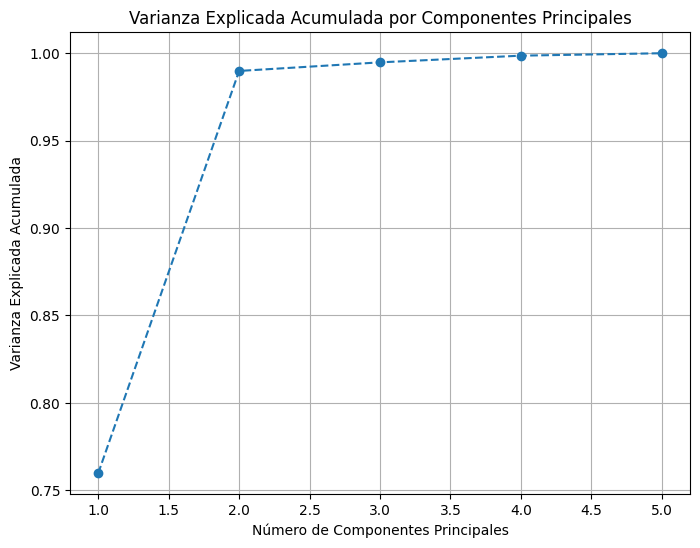

In [92]:
import matplotlib.pyplot as plt
# Graficar la varianza explicada acumulada:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.grid(True)
plt.show()

Seleccionar el número de componentes:

In [93]:
# Seleccionar PCA con el número adecuado de componentes (ejemplo: 90% de varianza explicada)
pca_n = PCA(n_components=0.90)  # Elige el porcentaje de varianza que desees retener
data_pca_n = pca_n.fit_transform(data_encoded)

# Verificar la cantidad de componentes seleccionados
print(f"Componentes seleccionados que explican el 90% de la varianza: {pca_n.n_components_}")


Componentes seleccionados que explican el 90% de la varianza: 2


Mostrar los datos transformados con PCA:

In [94]:
# Visualizar los datos transformados en el nuevo espacio
print("Datos transformados con PCA:", data_pca_n[:5])  # Muestra las primeras 5 filas transformadas

Datos transformados con PCA: [[-0.05120238 -0.50626062]
 [ 0.55893826 -0.43812123]
 [-0.44848348 -0.45475303]
 [ 0.24161355 -0.38637767]
 [-0.82733292 -0.40583079]]


Obtener los cargamentos

In [95]:
# Obtener los cargamentos de los componentes
loadings = pca_n.components_.T  # Transponer para obtener los cargamentos en forma de columnas

# Convertir a DataFrame para una mejor visualización
loadings_df = pd.DataFrame(loadings, columns=[f'Componente {i+1}' for i in range(pca_n.n_components_)],
                            index=data_encoded.columns)

print(loadings_df)

                      Componente 1  Componente 2
ID                       -0.052896      0.997805
Edad                      0.511448      0.042609
Ingresos                  0.499976      0.020682
Gasto_Mensual             0.512228      0.045889
Calificación_Crédito      0.472514     -0.006050


Identificar variables importantes para cada componente:

In [96]:
# Mostrar las variables que más contribuyen a cada componente
for i in range(pca_n.n_components_):
    print(f"Variables más influyentes en Componente {i + 1}:")
    print(loadings_df.nlargest(5, loadings_df.columns[i]))  # Las 5 variables más importantes
    print("\n")

Variables más influyentes en Componente 1:
                      Componente 1  Componente 2
Gasto_Mensual             0.512228      0.045889
Edad                      0.511448      0.042609
Ingresos                  0.499976      0.020682
Calificación_Crédito      0.472514     -0.006050
ID                       -0.052896      0.997805


Variables más influyentes en Componente 2:
                      Componente 1  Componente 2
ID                       -0.052896      0.997805
Gasto_Mensual             0.512228      0.045889
Edad                      0.511448      0.042609
Ingresos                  0.499976      0.020682
Calificación_Crédito      0.472514     -0.006050




Varianza Explicada

In [97]:
explained_variance_per_component = pca_n.explained_variance_ratio_

for i, var in enumerate(explained_variance_per_component):
    print(f"Componente {i + 1}: {var * 100:.2f}% de varianza explicada")

Componente 1: 75.98% de varianza explicada
Componente 2: 23.01% de varianza explicada


Crear gráfico de dispersión para los dos primeros componentes principales:

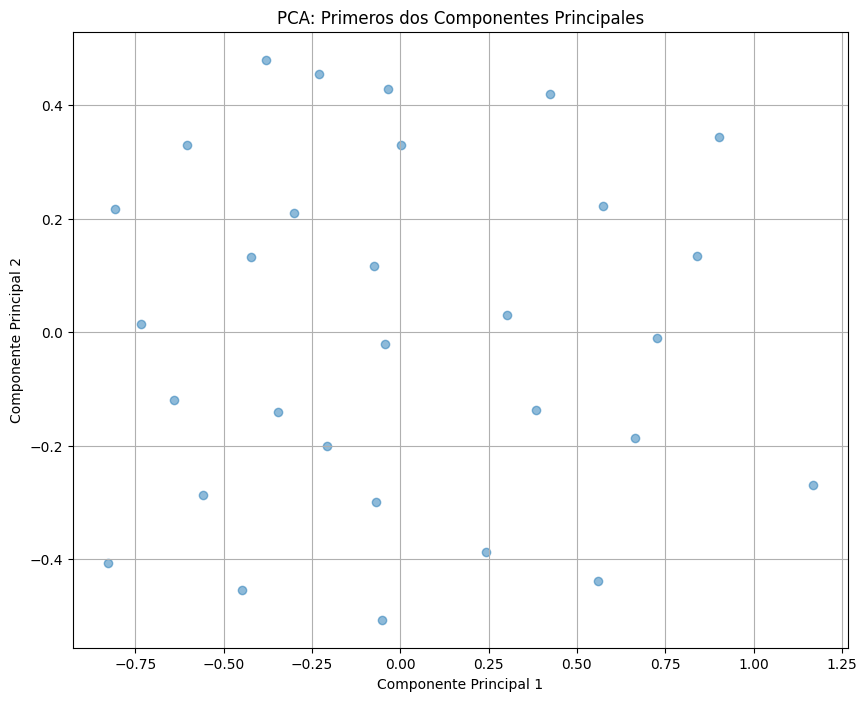

In [98]:
plt.figure(figsize=(10, 8))
plt.scatter(data_pca_n[:, 0], data_pca_n[:, 1], alpha=0.5)
plt.title('PCA: Primeros dos Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

Gráfico de la Varianza Explicada:

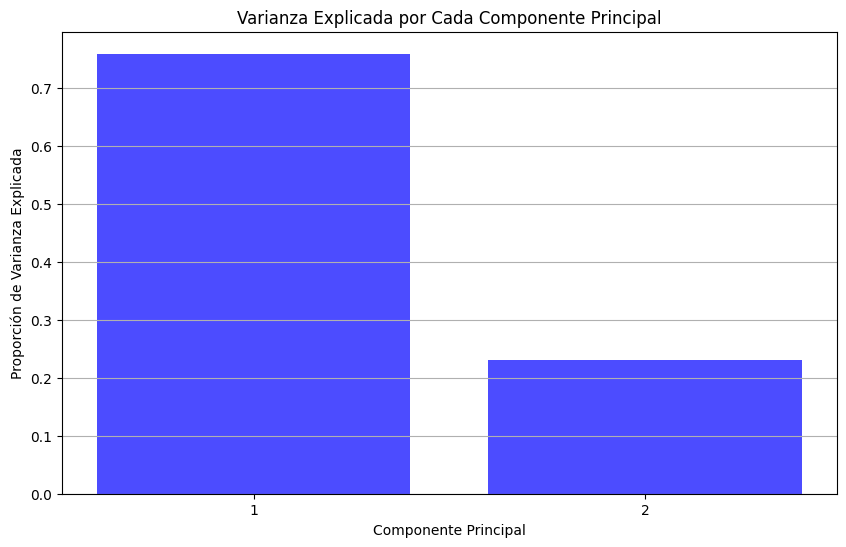

In [99]:
# Gráfico de la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, pca_n.n_components_ + 1), pca_n.explained_variance_ratio_, alpha=0.7, color='b', align='center')
plt.ylabel('Proporción de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.xticks(range(1, pca_n.n_components_ + 1))
plt.grid(axis='y')
plt.show()

Gráfico de Dispersión para los Primeros Dos Componentes:

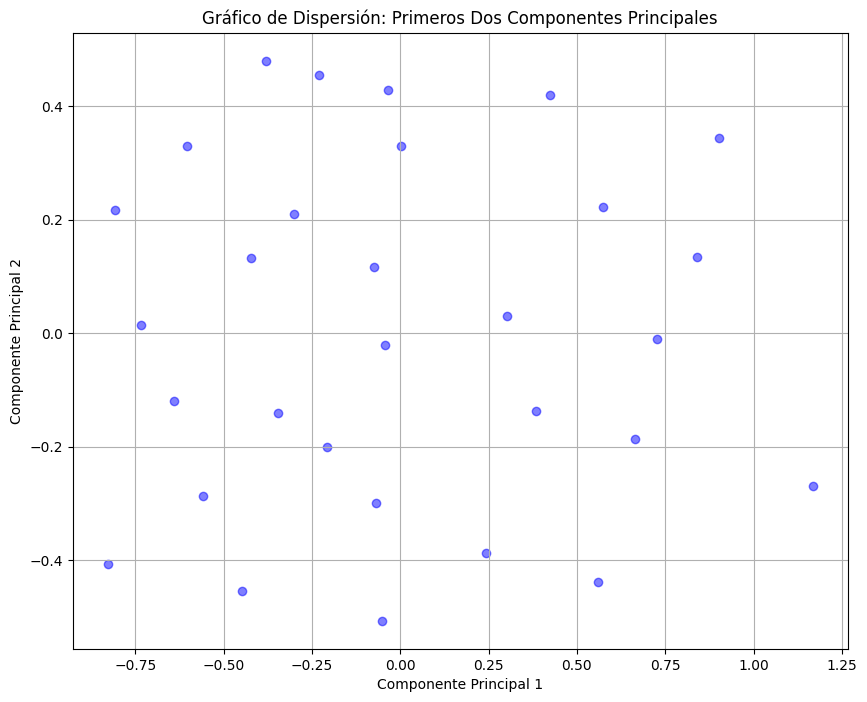

In [100]:
plt.figure(figsize=(10, 8))
plt.scatter(data_pca_n[:, 0], data_pca_n[:, 1], alpha=0.5, c='b')
plt.title('Gráfico de Dispersión: Primeros Dos Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

 Visualización de Cargamentos de Componentes

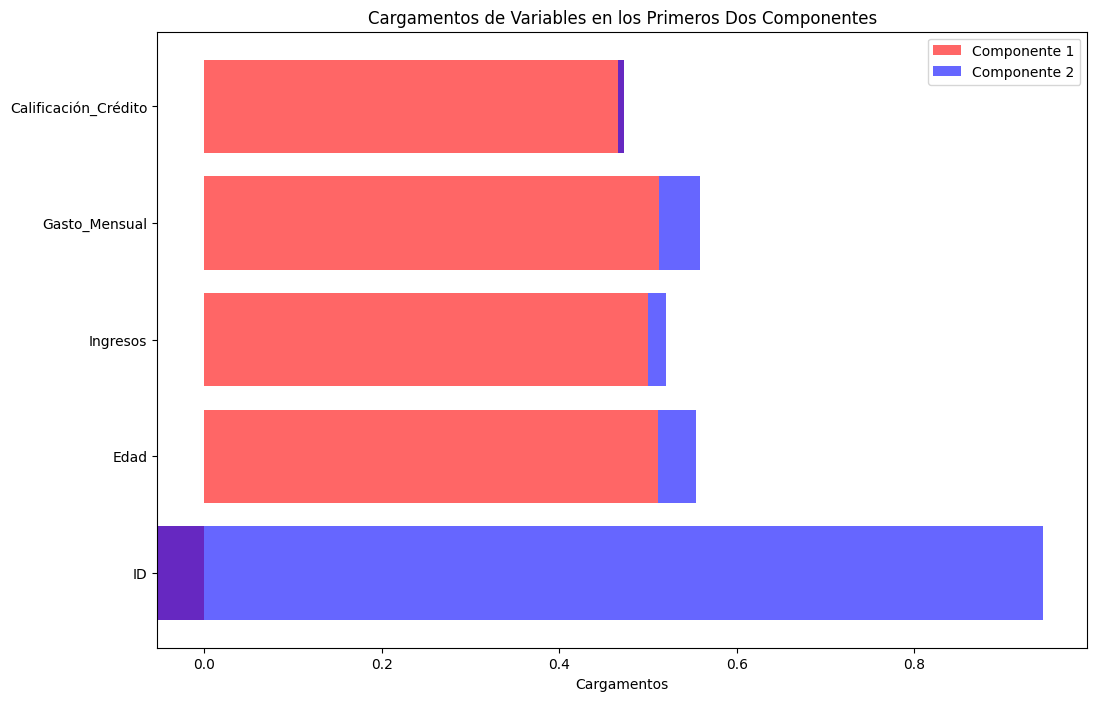

In [101]:
plt.figure(figsize=(12, 8))
plt.barh(loadings_df.index, loadings_df['Componente 1'], color='r', alpha=0.6, label='Componente 1')
plt.barh(loadings_df.index, loadings_df['Componente 2'], color='b', alpha=0.6, label='Componente 2', left=loadings_df['Componente 1'])
plt.xlabel('Cargamentos')
plt.title('Cargamentos de Variables en los Primeros Dos Componentes')
plt.legend()
plt.show()

Gráfico Biplot:

C:\Users\gabri\AppData\Local\Temp\ipykernel_11308\68628212.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0, 0, loadings_df['Componente 1'][i], loadings_df['Componente 2'][i],
C:\Users\gabri\AppData\Local\Temp\ipykernel_11308\68628212.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings_df['Componente 1'][i], loadings_df['Componente 2'][i],


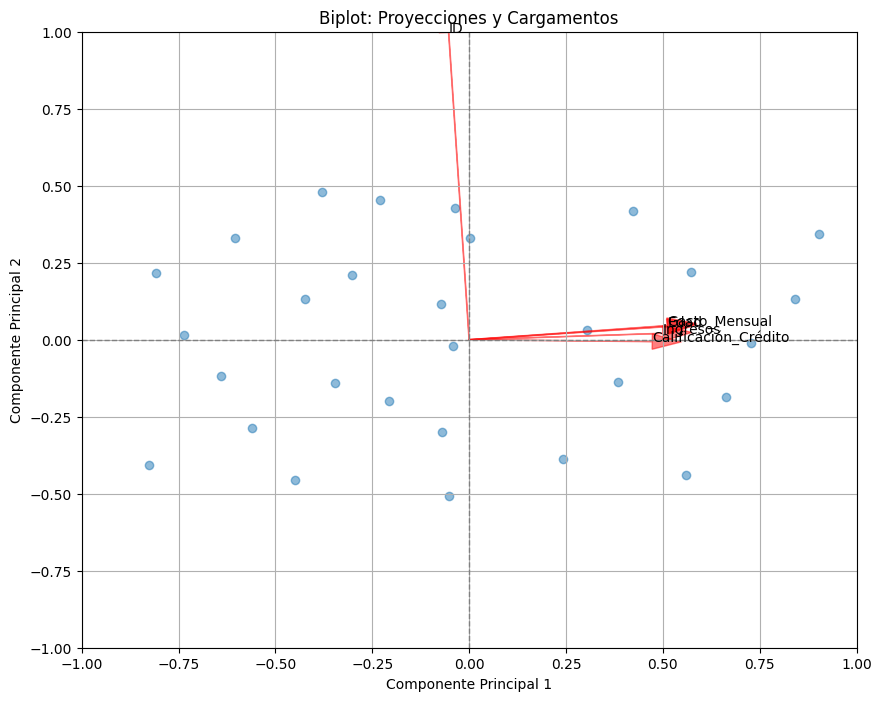

In [102]:
plt.figure(figsize=(10, 8))
plt.scatter(data_pca_n[:, 0], data_pca_n[:, 1], alpha=0.5)
for i in range(loadings_df.shape[0]):
    plt.arrow(0, 0, loadings_df['Componente 1'][i], loadings_df['Componente 2'][i],
              color='r', alpha=0.5, head_width=0.05)
    plt.text(loadings_df['Componente 1'][i], loadings_df['Componente 2'][i],
             loadings_df.index[i], color='black')
plt.title('Biplot: Proyecciones y Cargamentos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.xlim(-1, 1)  # Ajustar límites según sea necesario
plt.ylim(-1, 1)  # Ajustar límites según sea necesario
plt.axhline(0, color='gray', lw=1, ls='--')
plt.axvline(0, color='gray', lw=1, ls='--')
plt.show()